[-23.00309186] [-110.04730756]


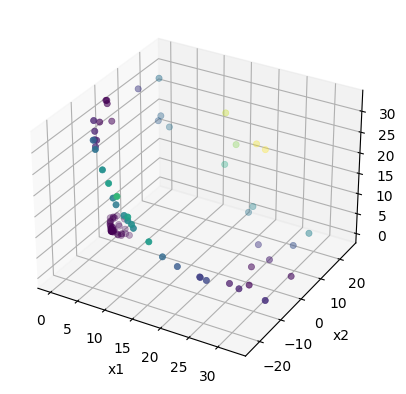

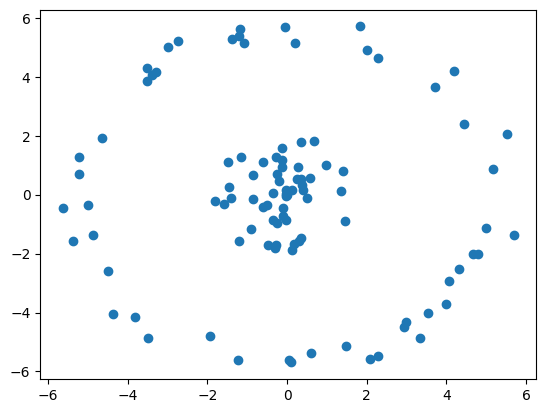

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Number of points
num_points = 100

# Generate random angles
angles = np.random.uniform(0, 2*np.pi, num_points)

# Inner and outer radius of the ring
inner_radius = 2
outer_radius = 5

# Generate random radii within the ring
inner_radii = np.random.uniform(0, inner_radius, num_points//2)
outer_radii = np.random.uniform(outer_radius, outer_radius*1.2, num_points//2)

# Convert polar coordinates to Cartesian coordinates
x1_inner = inner_radii * np.cos(angles[:num_points//2])
x2_inner = inner_radii * np.sin(angles[:num_points//2])

x1_outer = outer_radii * np.cos(angles[num_points//2:])
x2_outer = outer_radii * np.sin(angles[num_points//2:])

# Concatenate the data and labels
x1 = np.concatenate((x1_inner, x1_outer))
x2 = np.concatenate((x2_inner, x2_outer))
labels = np.concatenate((np.ones(num_points//2), -np.ones(num_points//2)))


z = [(np.dot(x1[i], x2[i])+1)**2 for i in range(len(labels))]
N = len(labels)
lam = 1
alpha = .1
epochs = 100
w = np.zeros(1)
b = np.zeros(1)



for epoch in range(epochs):
    w_grad = 0
    b_grad = 0

    for i in range(N):
        hinge_loss = (max(0, 1-(np.dot(x2[i], (np.dot(w,x1[i]) - b)))))

        if hinge_loss > 0:
             w_grad += np.dot(-x2[i], x1[i])
             b_grad += -x2[i]

    w_grad += lam * w
    b_grad += lam * b

    w -= alpha * w_grad 
    b -= alpha * b_grad

print(w,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1**2, np.sqrt(2) * x1 * x2, x2**2, c=z, cmap='viridis', linewidth=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')




plt.show()
plt.plot(x1,x2, 'o')
plt.show()


